In [1]:
#]activate /home/ab/src/Causality

  Activating project at `~/src/Causality`


In [11]:
using Causality
using Causality: infect, cumulated, density
using IntervalUnionArithmetic

In [12]:
using Plots: xlims!, histogram, plot!

function doplot(r)
    xmax = 15
    tt=0:xmax/1000:xmax; 
    tj=1.0
    xlims!((0,xmax))
    histogram(min.(xmax+1, [infect(r,tj) for i=1:10^6]), normalize=:true, label="samples", nbins=:auto)
    rho(t, tj) = exp(cumulated(r,tj)-cumulated(r, t)) * density(r, t) * (t≥tj)
    xlims!((0,xmax))
    plot!(tt, rho.(tt, tj), label="analytic")
end

doplot (generic function with 1 method)

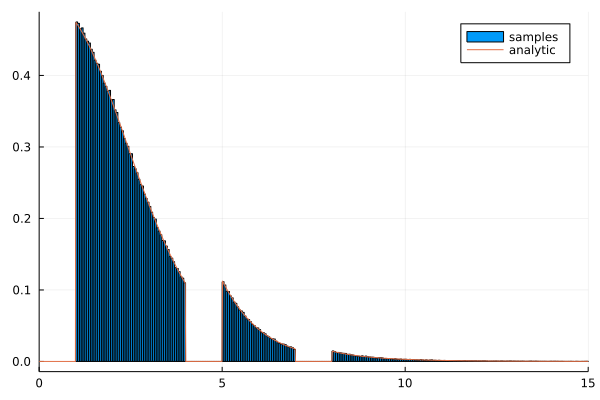

In [13]:
g = GaussianRate(0.9,5.0,5.0)
mask = Interval(0.1,4.0)∪Interval(5.0,7.0)∪Interval(8.,15.)
mg = MaskedRate(g, mask)
doplot(mg)

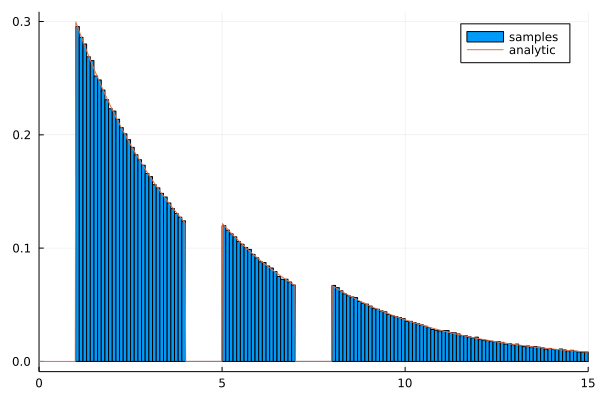

In [14]:
c = ConstantRate(0.3)
mc = MaskedRate(c, mask)
doplot(mc)